### Introduction to Keras

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

### **Keras**

Keras is a high level Deep Learning Python library.

The main idea behind the Keras Deep Learning lib is that a deep learning model is usually a **directed acyclic graph (DAG) of layers**.

Using the different available API, you will be able to build those *graphs of layers.*

#### Layers



##### Fully Connected Layers

In [ ]:
output_size=128
activation='sigmoid'
fc = keras.layers.Dense(output_size, activation=activation, use_bias=True)

##### Convolutional Layers

In [ ]:
output_features=128
kernel_size=(3, 3)
activation='sigmoid'
fc = keras.layers.Conv2D(output_features, kernel_size, activation=activation, use_bias=True)

#### Functional API

The Keras functional API is a way to create models that are more flexible than the tf.keras.Sequential API.

The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

To demonstrate consider the following code, defining a very simple Fully Connected model.

In [ ]:
inputs = keras.Input(shape=(50,))

# In the Fonctional API, the next layer is defined using LayerClass(*args)(last_layer_outputs)
y = keras.layers.Dense(128, activation="sigmoid", name="layer1")(inputs)
outputs = keras.layers.Dense(32, activation="softmax", name="output")(y)

At this point you can create the Model by specifying the inputs and outputs in the graph of layers


In [ ]:
model = keras.Model(inputs=inputs, outputs=outputs, name="model")

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 layer1 (Dense)              (None, 128)               6528      
                                                                 
 output (Dense)              (None, 32)                4128      
                                                                 
Total params: 10,656
Trainable params: 10,656
Non-trainable params: 0
_________________________________________________________________


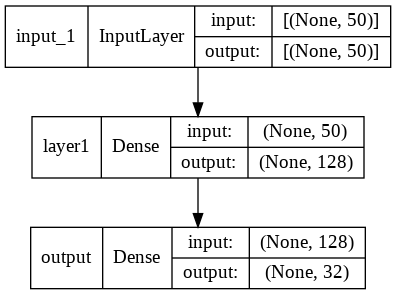

In [ ]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

#### Sequential API

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

Let's define the same model as before but using this new API.

In [ ]:
# Define Sequential model with 2 layers
model = keras.Sequential(
    [
        keras.layers.Dense(128, activation="sigmoid", name="layer1"),
        keras.layers.Dense(32, activation="softmax", name="output"),
    ]
)
# Call model on a test input
x = tf.ones((1, 50))
y = model(x)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (1, 128)                  6528      
                                                                 
 output (Dense)              (1, 32)                   4128      
                                                                 
Total params: 10,656
Trainable params: 10,656
Non-trainable params: 0
_________________________________________________________________


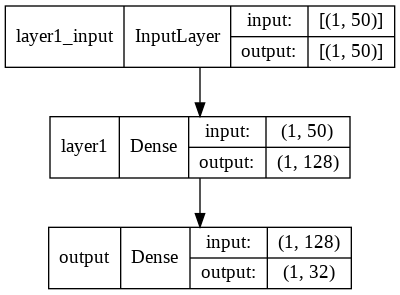

In [ ]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

#### Exercise 1 : Simple Feed Forward Network

Create a simple feed forward that takes a flattened MNIST input (28x28) and outputs the classification vector.

It should have one hidden layer with 100 neurons and a tanh output, and a Dense output layer with a softmax activation.

In [ ]:
# TODO: Put your code here

# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        keras.layers.Dense(100, activation="tanh", name="layer1"),
        keras.layers.Dense(32, activation="softmax", name="output"),
    ]
)
# Call model on a test input
x = tf.ones((1, 784))
y = model(x)

# TODO: end

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (1, 100)                  78500     
                                                                 
 output (Dense)              (1, 32)                   3232      
                                                                 
Total params: 81,732
Trainable params: 81,732
Non-trainable params: 0
_________________________________________________________________


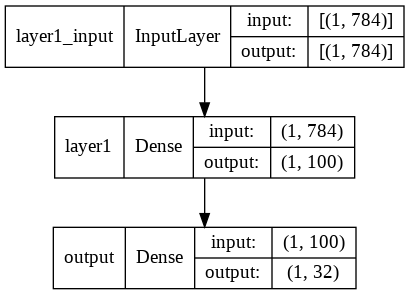

In [ ]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

#### Training

First we need to load some data to train our model with

In [ ]:
# Loading the Mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

11501568/11490434 [==============================] - 0s 0us/step


#### Compiling the Model

To train a model with fit(), you need to specify a **loss function, an optimizer, and optionally, some metrics to monitor**.

You pass these to the model as arguments to the [compile](https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class)() method.

*   The loss argument is a callable with arguments loss_fn(y_true, y_pred,sample_weight=None). The compile function can also accept some defined string arguments such as: "*mean_absolute_error*", "*mean_squared_error*", "*binary_crossentropy*"...
*   Similarly, the optimizer argument can also accept "*adam*", "*sgd*"...
*   The metrics argument should be a list -- your model can have any number of metrics.


In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=32, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3573 - accuracy: 0.8989 - val_loss: 0.2129 - val_accuracy: 0.9399
Epoch 2/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1938 - accuracy: 0.9434 - val_loss: 0.1620 - val_accuracy: 0.9559
Epoch 3/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1462 - accuracy: 0.9578 - val_loss: 0.1443 - val_accuracy: 0.9588
Epoch 4/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1183 - accuracy: 0.9662 - val_loss: 0.1297 - val_accuracy: 0.9619
Epoch 5/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0998 - accuracy: 0.9709 - val_loss: 0.1145 - val_accuracy: 0.9662
Epoch 6/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0854 - accuracy: 0.9754 - val_loss: 0.1056 - val_accuracy: 0.9692
Epoch 7/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0744 - accuracy: 0.9788 - val_loss: 0.1141 - val_accuracy:

Let's visualise the convergence

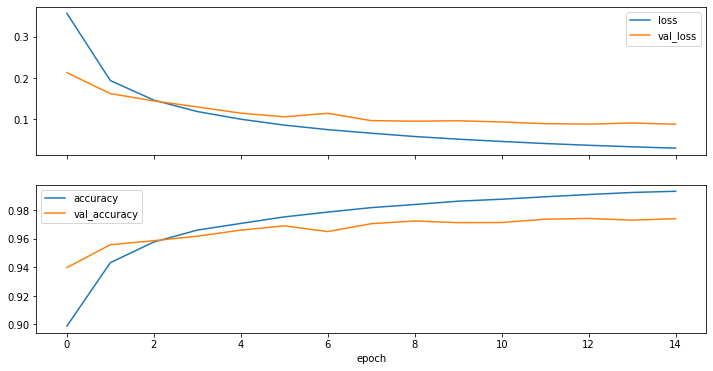

In [ ]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

In [ ]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 1s - loss: 0.0745 - accuracy: 0.9767 - 613ms/epoch - 2ms/step
Test loss: 0.07452923059463501
Test accuracy: 0.9767000079154968


#### Exercise 2 : Impact of the Optimiser



1.   Try replacing the value of the learning rate by 0.01 or 0.001. What happens ?
2.   Try increasing the learning rate until the model diverge. At what lr does the model diverge ?
3.   Try adding Nesterov Momentum with a value of 0.8 to SGD. How many epochs does it need to converge ?



In [ ]:
keras.optimizers.SGD?

Epoch 1/15
1500/1500 [==============================] - 4s 2ms/step - loss: 2.0583 - accuracy: 0.5430 - val_loss: 1.3443 - val_accuracy: 0.7745
Epoch 2/15
1500/1500 [==============================] - 3s 2ms/step - loss: 1.1269 - accuracy: 0.7870 - val_loss: 0.9078 - val_accuracy: 0.8263
Epoch 3/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.8423 - accuracy: 0.8248 - val_loss: 0.7184 - val_accuracy: 0.8508
Epoch 4/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7023 - accuracy: 0.8444 - val_loss: 0.6151 - val_accuracy: 0.8644
Epoch 5/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6191 - accuracy: 0.8561 - val_loss: 0.5498 - val_accuracy: 0.8735
Epoch 6/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5636 - accuracy: 0.8641 - val_loss: 0.5050 - val_accuracy: 0.8801
Epoch 7/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5235 - accuracy: 0.8710 - val_loss: 0.4722 - val_accuracy:

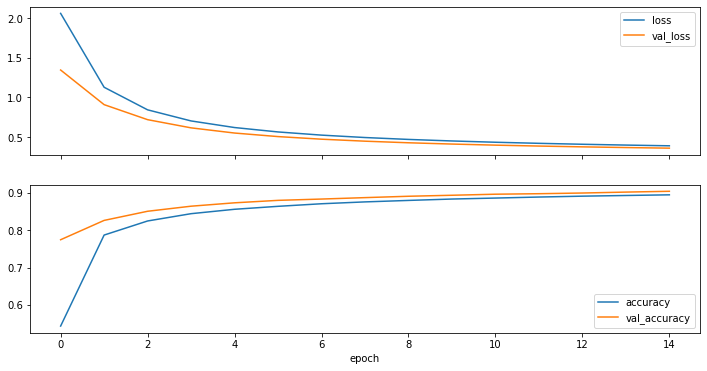

In [ ]:
# TODO: Put your code here

# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        keras.layers.Dense(100, activation="tanh", name="layer1"),
        keras.layers.Dense(32, activation="softmax", name="output"),
    ]
)
# Call model on a test input
x = tf.ones((1, 784))
y = model(x)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(learning_rate=.001),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=32, epochs=15, validation_split=0.2)

import pandas as pd

history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

# TODO: end

Epoch 1/15
1500/1500 [==============================] - 5s 3ms/step - loss: 445.3122 - accuracy: 0.1056 - val_loss: 303.3866 - val_accuracy: 0.1060
Epoch 2/15
1500/1500 [==============================] - 4s 2ms/step - loss: 466.7409 - accuracy: 0.1000 - val_loss: 370.0617 - val_accuracy: 0.0989
Epoch 3/15
1500/1500 [==============================] - 4s 2ms/step - loss: 449.2248 - accuracy: 0.1056 - val_loss: 341.4644 - val_accuracy: 0.0989
Epoch 4/15
1500/1500 [==============================] - 3s 2ms/step - loss: 371.1186 - accuracy: 0.1654 - val_loss: 283.7797 - val_accuracy: 0.1988
Epoch 5/15
1500/1500 [==============================] - 3s 2ms/step - loss: 392.3620 - accuracy: 0.1635 - val_loss: 372.9812 - val_accuracy: 0.1782
Epoch 6/15
1500/1500 [==============================] - 3s 2ms/step - loss: 377.7506 - accuracy: 0.1350 - val_loss: 352.8007 - val_accuracy: 0.1885
Epoch 7/15
1500/1500 [==============================] - 3s 2ms/step - loss: 372.5514 - accuracy: 0.1776 - val_lo

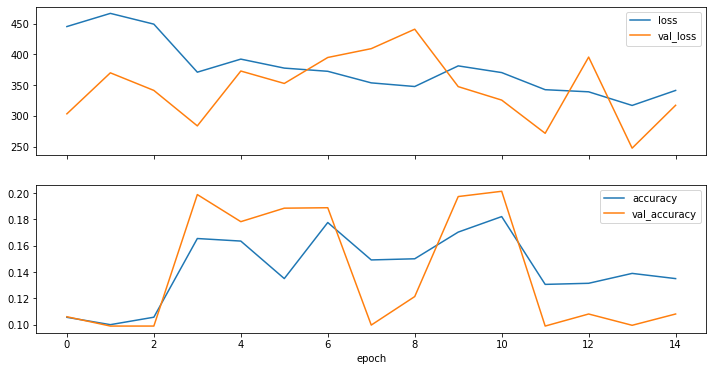

In [ ]:
# TODO: Put your code here

# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        keras.layers.Dense(100, activation="tanh", name="layer1"),
        keras.layers.Dense(32, activation="softmax", name="output"),
    ]
)
# Call model on a test input
x = tf.ones((1, 784))
y = model(x)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(learning_rate=10.),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=32, epochs=15, validation_split=0.2)

import pandas as pd

history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

# TODO: end

Epoch 1/3
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2739 - accuracy: 0.9188 - val_loss: 0.1643 - val_accuracy: 0.9509
Epoch 2/3
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1621 - accuracy: 0.9517 - val_loss: 0.1712 - val_accuracy: 0.9531
Epoch 3/3
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1383 - accuracy: 0.9594 - val_loss: 0.1677 - val_accuracy: 0.9528


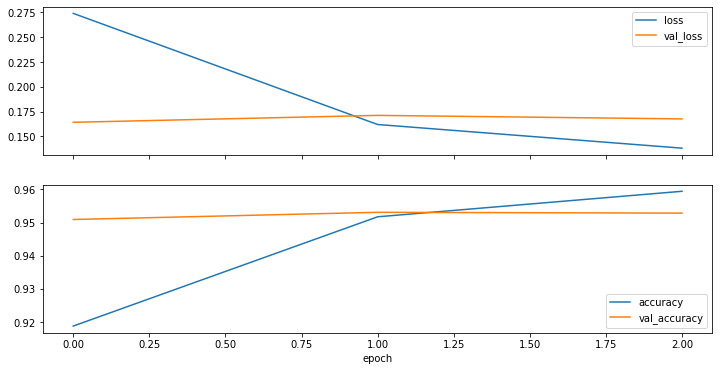

In [ ]:
# TODO: Put your code here

# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        keras.layers.Dense(100, activation="tanh", name="layer1"),
        keras.layers.Dense(32, activation="softmax", name="output"),
    ]
)
# Call model on a test input
x = tf.ones((1, 784))
y = model(x)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=32, epochs=3, validation_split=0.2)

import pandas as pd

history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

# TODO: end

4. Replace SGD by Adam optimizer and run it


Epoch 1/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3412 - accuracy: 0.9057 - val_loss: 0.1931 - val_accuracy: 0.9459
Epoch 2/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1635 - accuracy: 0.9532 - val_loss: 0.1453 - val_accuracy: 0.9587
Epoch 3/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1159 - accuracy: 0.9669 - val_loss: 0.1254 - val_accuracy: 0.9642
Epoch 4/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0888 - accuracy: 0.9745 - val_loss: 0.1155 - val_accuracy: 0.9654
Epoch 5/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0694 - accuracy: 0.9805 - val_loss: 0.0974 - val_accuracy: 0.9703
Epoch 6/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0559 - accuracy: 0.9845 - val_loss: 0.0983 - val_accuracy: 0.9717
Epoch 7/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0447 - accuracy: 0.9879 - val_loss: 0.0993 - val_accuracy:

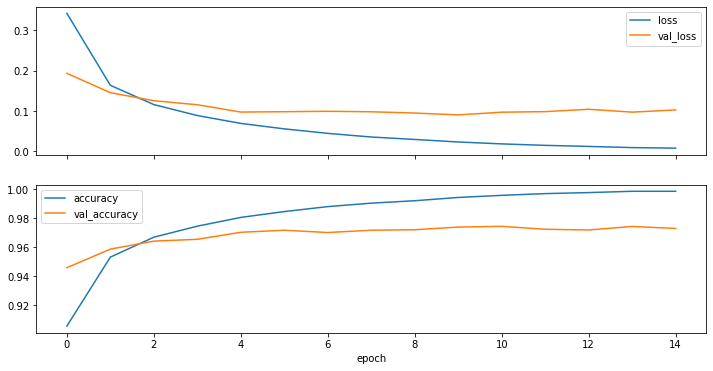

In [ ]:
# TODO: Put your code here

# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        keras.layers.Dense(100, activation="tanh", name="layer1"),
        keras.layers.Dense(32, activation="softmax", name="output"),
    ]
)
# Call model on a test input
x = tf.ones((1, 784))
y = model(x)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=32, epochs=15, validation_split=0.2)

import pandas as pd

history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1);

# TODO: end

#### Exercise 3 : Simple MNIST LeNet (Convolutional Networks)

[Y. Lecun, 1998](https://ieeexplore.ieee.org/abstract/document/726791)

    
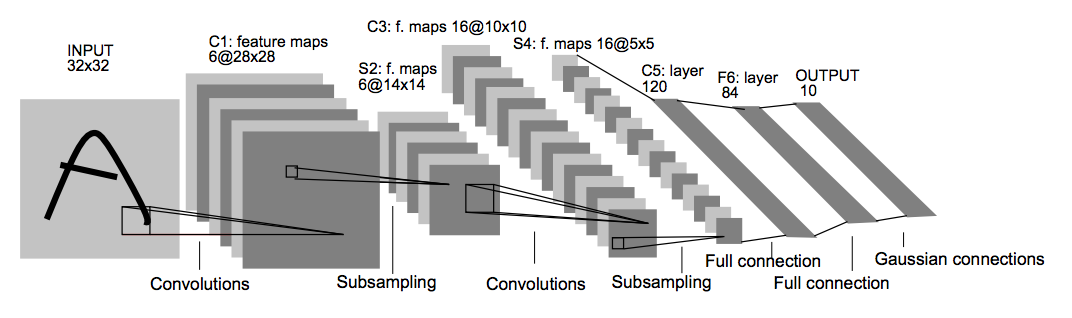




1.   Image Input: 28 (height) x 28 (width) x 1 (channel) 
2.   Convolution with 5x5 kernel + padding: 28x28x6 \[sigmoid activation\]
3.   Pooling with 2x2 average kernel: 14x14x6
4.   Convolution with 5x5 kernel (no padding): 10x10x16 \[sigmoid activation\]
5.   Pooling with 2x2 average kernel: 5x5x16
6.   Flatten
7.   Dense: 120 fully connected neurons \[sigmoid activation\]
8.   Dense: 84 fully connected neurons \[sigmoid activation\]
9.   Dense: 10 fully connected neurons \[softmax activation\]
10.  Output: 1 out of 10 classes




In [ ]:
# Loading the Mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [ ]:
# TODO: your code goes here [You can use either API for this model]

lenet = keras.Sequential()
lenet.add(layers.Conv2D(filters=6, kernel_size=(5, 5), padding="same", activation='sigmoid', input_shape=(28, 28, 1)))
lenet.add(layers.AveragePooling2D())

lenet.add(layers.Conv2D(filters=16, kernel_size=(5, 5), padding="valid", activation='sigmoid'))
lenet.add(layers.AveragePooling2D())

lenet.add(layers.Flatten())

lenet.add(layers.Dense(units=120, activation='sigmoid'))

lenet.add(layers.Dense(units=84, activation='sigmoid'))

lenet.add(layers.Dense(units=10, activation = 'softmax'))

# TODO: end

In [ ]:
lenet.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense_1 (Dense)             (None, 120)              

In [ ]:
lenet.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

history = lenet.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

Epoch 1/2
750/750 [==============================] - 29s 38ms/step - loss: 1.1237 - accuracy: 0.6392 - val_loss: 0.3563 - val_accuracy: 0.9025
Epoch 2/2
750/750 [==============================] - 30s 40ms/step - loss: 0.2974 - accuracy: 0.9119 - val_loss: 0.2309 - val_accuracy: 0.9299


In [ ]:
test_scores = lenet.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 3s - loss: 0.2353 - accuracy: 0.9272 - 3s/epoch - 9ms/step
Test loss: 0.23527812957763672
Test accuracy: 0.9272000193595886


In [ ]:
y_pred=lenet(np.expand_dims(x_test[0], 0))
y_pred.shape

TensorShape([1, 10])

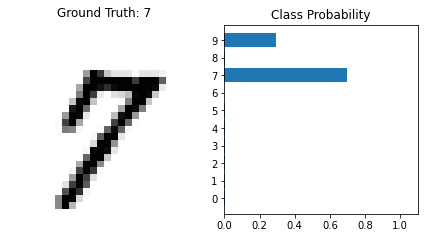

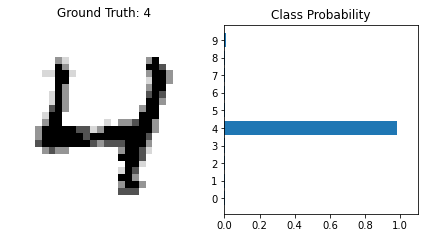

In [ ]:
import random
import matplotlib.patches as patches
import tensorflow as tf

def test_model(x_test, y_test, model):
    n =  random.randint(0, x_test.shape[0])
    x = np.expand_dims(x_test[n], 0)
    y_pred=model(x)


    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.set_title('Ground Truth: {}'.format(y_test[n]))
    ax1.imshow(x_test[n], "Greys")
    ax1.axis('off')
    ax2.barh(np.arange(10), tf.squeeze(y_pred))
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

test_model(x_test, y_test, lenet)
test_model(x_test, y_test, lenet)